In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import statistics


%matplotlib inline

In [2]:
def ols_model(x_data, y_data):
    
    scaler = StandardScaler()
    fit = scaler.fit(x_data)

    train = fit.transform(x_data)
    model = LinearRegression(fit_intercept=True).fit(train, y_data)
    
    
    return fit, model

def fsw_alg(x_data,training_ages, test, test_ages, corr_list, n_cpgs):   
    training_rs = []
    training_maes = []

    test_rs = []
    test_maes = []

    for i in range(n_cpgs):
        training=x_data[corr_list.CpG.tolist()[:i+1]]
        
        #Split the dataset into training and test subsets 
        methyl_train, methyl_test, age_train, age_test = train_test_split(training, training_ages.Age, test_size=0.2, random_state=42)
        
        fit, model = ols_model(methyl_train, age_train)
        
        methyl_test = fit.transform(methyl_test)
        preds = model.predict(methyl_test)

        regression = stats.linregress(preds.astype(float), age_test.astype(float))
        slope, intercept, rvalue, pvalue, stderr = regression
        training_maes += [metrics.mean_absolute_error(preds, age_test)]
        training_rs+= [rvalue]



        arts_test = arts[hannumrs.CpG.tolist()[:i+1]]
        arts_test = fit.transform(arts_test)
        preds = model.predict(arts_test)

        regression = stats.linregress(preds.astype(float), arts_ages.Age.astype(float))
        slope, intercept, rvalue, pvalue, stderr = regression
        test_maes += [metrics.mean_absolute_error(preds, arts_ages.Age)]
        test_rs += [rvalue]
        
    return  training_rs, training_maes, test_rs, test_maes

#### Must run to generate figures

In [3]:
ages = pd.read_excel('Training/DS3_ages.xlsx')
hannum = pd.read_pickle('Datasets/Hannum/Hannum.pkl')

# Panel 3A 

### top (model0)

r = 0.9508949064585333
p = 4.5089968421930575e-68
MAE = 3.7312053921167156


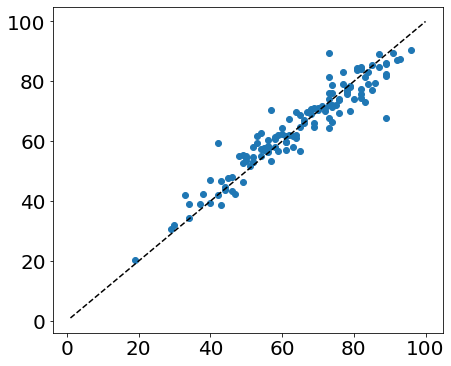

In [6]:
model0=joblib.load('Models/Fixed/model0 model.joblib')
fit0=joblib.load('Models/Fixed/model0 fit.joblib')

#Split the dataset into training and test subsets 
methyl_train, methyl_test, age_train, age_test = train_test_split(hannum, ages, test_size=0.2, random_state=42)

methyl_test = fit0.transform(methyl_test)
preds = model0.predict(methyl_test)

#make scatterplot of age v. DNAm age and plot the BLP  
regression = stats.linregress(age_test.Age.astype(float), preds.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * age_test.Age + intercept

plt.figure(figsize=(7, 6))
plt.scatter(age_test.Age, preds)
# plt.plot(age_test.Age, pred, color='red')
plt.plot(np.linspace(1,100,100), np.linspace(1,100,100), color='k', linestyle = 'dashed')

# plt.xlabel('Age (yrs)',fontsize=15)
# plt.ylabel('Predicted age (yrs)',fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
mae = metrics.mean_absolute_error(age_test.Age, preds)

# plt.title('Model 0: r={:.2f}, \n p={:.1g}, MAE={:.1f} yrs'.format(rvalue, pvalue, mae),fontsize=14)
# plt.savefig('Hannum figures/Figure 2/fixed/fig2 final/model0 predictions', dpi=300)

print('r =', rvalue)
print('p =', pvalue)
print('MAE =', mae)

### bottom (model1)

C:\Users\Colin\Anaconda3\lib\site-packages\sklearn\base.py:333: UserWarning: Trying to unpickle estimator ElasticNetCV from version 0.21.3 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\Colin\Anaconda3\lib\site-packages\sklearn\base.py:333: UserWarning: Trying to unpickle estimator StandardScaler from version 0.21.3 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


r = 0.9490289227768552
p = 4.79432905948671e-67
MAE = 4.282513161730226


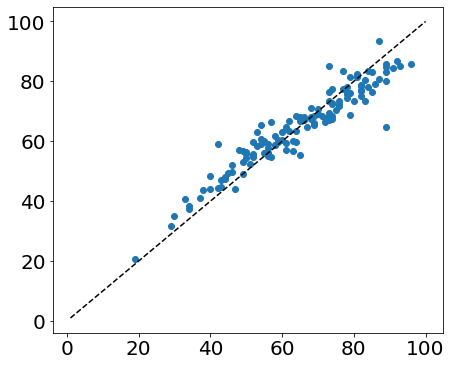

In [7]:
model1=joblib.load('Models/Fixed/model1 model.joblib')
fit1=joblib.load('Models/Fixed/model1 fit.joblib')

#model1 was trained on GSE40279 with the model0 CpGs removed, therefore these need to be dropped from the dataset
#grab model0 weights
coefs = pd.DataFrame({'CpG': hannum.columns,'Coef': model0.coef_})
#filter out zero weights
coefs = coefs.loc[coefs.iloc[:,1]!=0]
hannum1 = hannum.drop(coefs.CpG.tolist(), axis=1)

#Split the dataset into training and test subsets 
methyl_train, methyl_test, age_train, age_test = train_test_split(hannum1, ages, test_size=0.2, random_state=42)

methyl_test = fit1.transform(methyl_test)
preds = model1.predict(methyl_test)

#make scatterplot of age v. DNAm age and plot the BLP  
regression = stats.linregress(age_test.Age.astype(float), preds.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * age_test.Age + intercept

plt.figure(figsize=(7, 6))
plt.scatter(age_test.Age, preds)
# plt.plot(age_test.Age, pred, color='red')
plt.plot(np.linspace(1,100,100), np.linspace(1,100,100), color='k', linestyle = 'dashed')

# plt.xlabel('Age (yrs)',fontsize=15)
# plt.ylabel('Predicted age (yrs)',fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
mae = metrics.mean_absolute_error(age_test.Age, preds)

# plt.title('Model 1: r={:.2f}, \n p={:.1g}, MAE={:.1f} yrs'.format(rvalue, pvalue, mae),fontsize=14)
# plt.savefig('Hannum figures/Figure 2/fixed/fig2 final/model1 predictions', dpi=300)

print('r =', rvalue)
print('p =', pvalue)
print('MAE =', mae)

# Panel 3B

### top (model0)

C:\Users\Colin\Anaconda3\lib\site-packages\sklearn\base.py:333: UserWarning: Trying to unpickle estimator ElasticNetCV from version 0.21.3 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\Colin\Anaconda3\lib\site-packages\sklearn\base.py:333: UserWarning: Trying to unpickle estimator StandardScaler from version 0.21.3 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


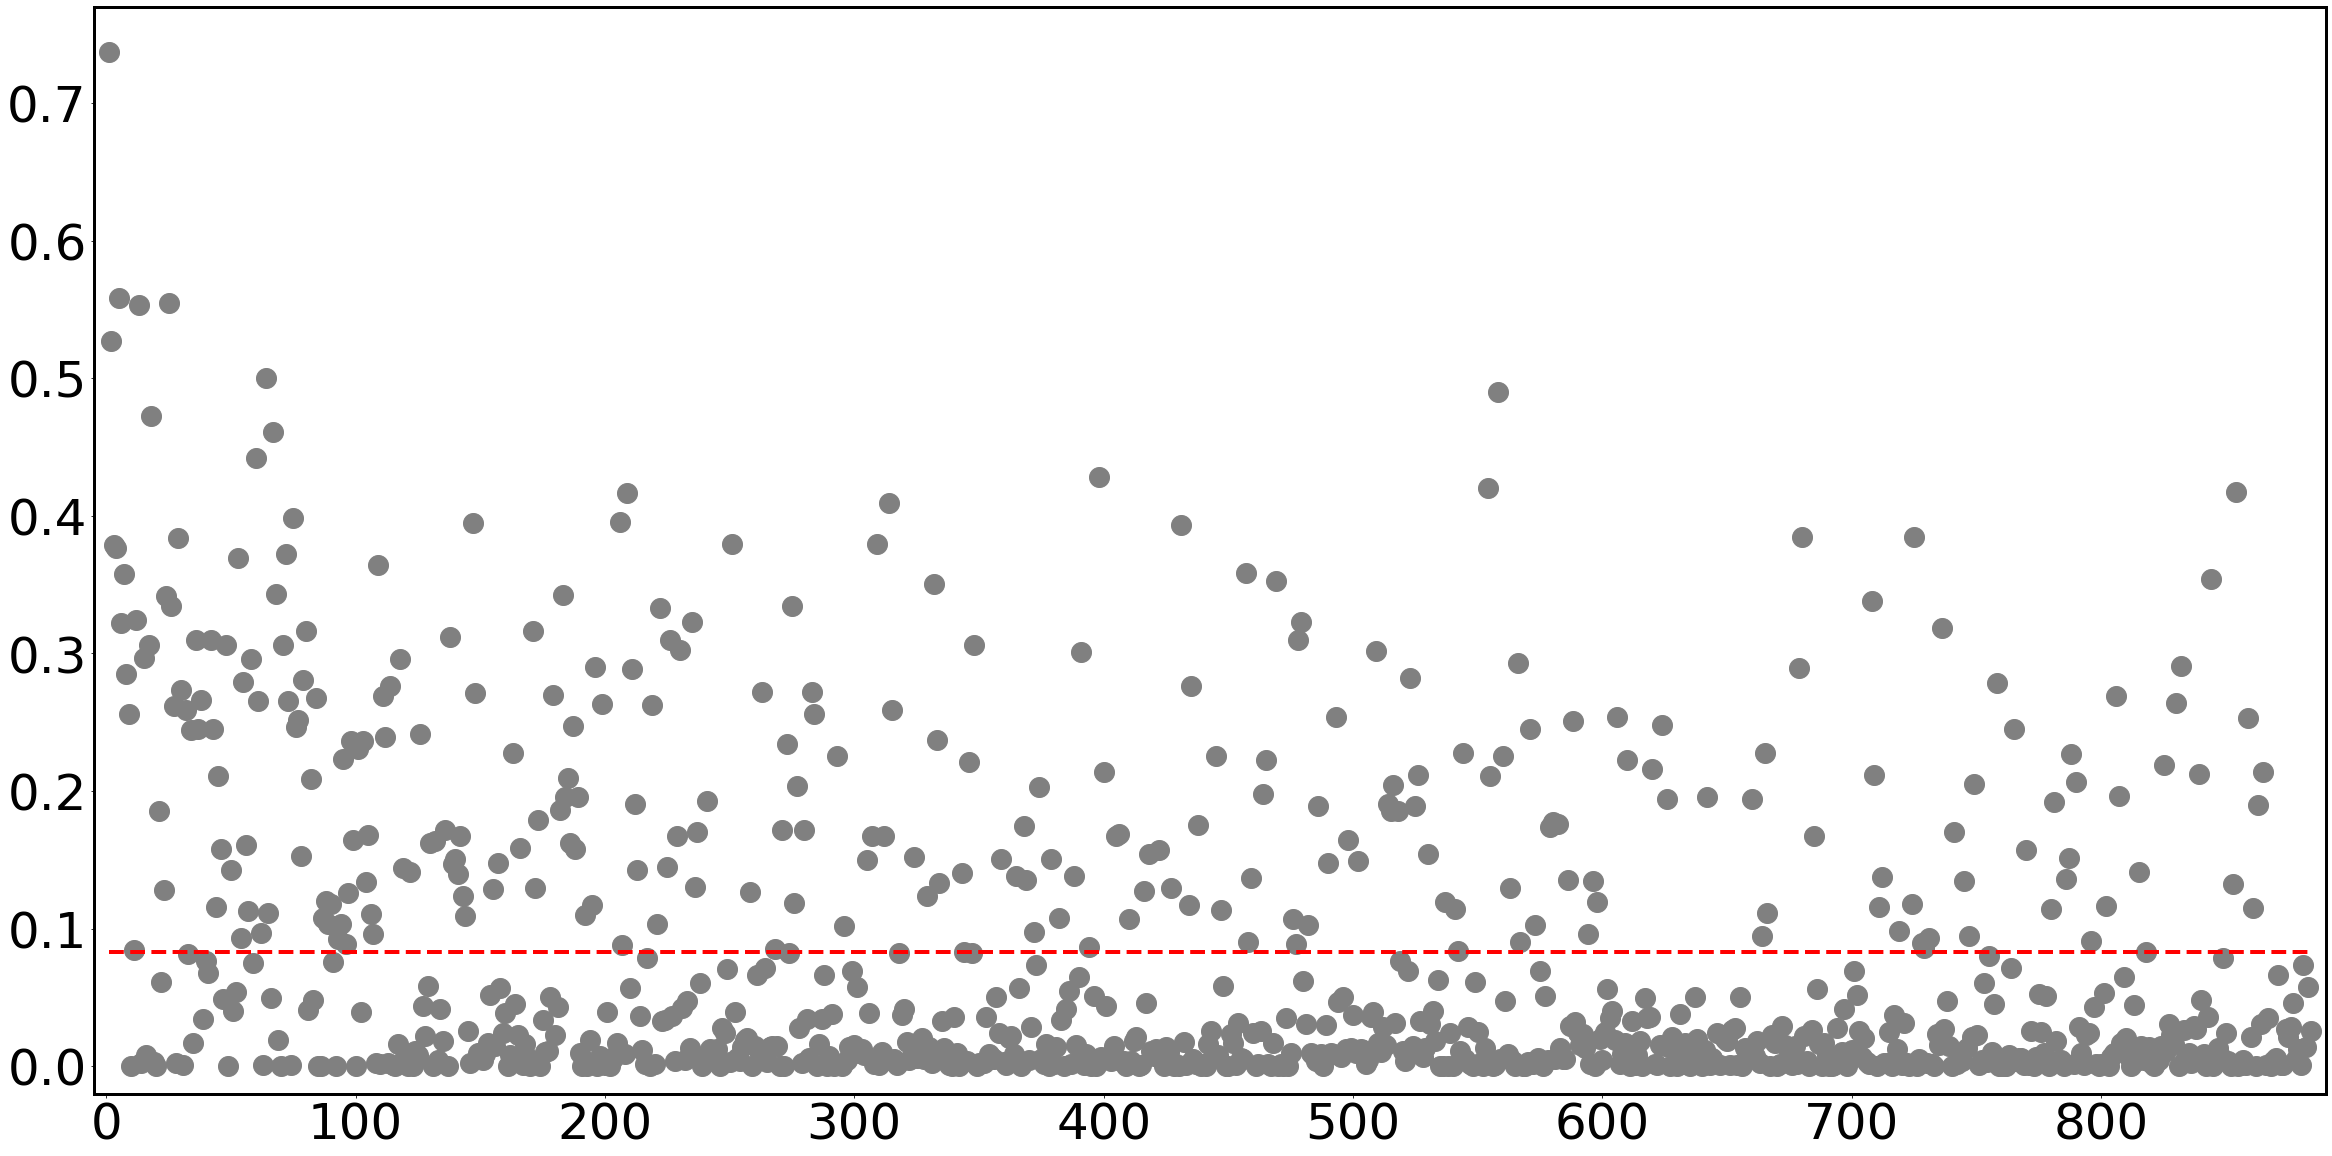

In [9]:
# Load model0
model0=joblib.load('Models/Fixed/model0 model.joblib')

#grab model0 weights
coefs = pd.DataFrame({'CpG': hannum.columns,'Coef': model0.coef_})
#filter out zero weights
coefs = coefs.loc[coefs.iloc[:,1]!=0]
#sort weights in descending order
coefs0 = coefs.reindex(coefs.Coef.abs().sort_values(ascending=False).index) 

#Calculate and store the R^2s for each selected CpG's correlation with age

rs = []

for cpg in coefs0.CpG.tolist():

    regression = stats.linregress(hannum[cpg].astype(float), ages.Age.astype(float))
    slope, intercept, rvalue, pvalue, stderr = regression
    rs += [rvalue*rvalue]

plt.figure(figsize=(40, 20))
plt.rcParams['axes.linewidth'] = 3 #set the value globally
plt.scatter(np.linspace(1, len(rs), len(rs)).astype(int), rs, s=400, c='gray')
# plt.xlabel('Rank',fontsize=50)
# plt.ylabel('R^2',fontsize=35)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.plot(np.linspace(1, len(rs), len(rs)).astype(int),statistics.mean(rs)*np.ones(len(rs)), linewidth=4, c='r', linestyle='dashed')
plt.xlim([-5,890])
plt.ylim([-0.02,0.77])
plt.savefig('Hannum figures/Figure 2/fixed/fig2 final/EN base model features Rsquared', dpi=300)

### bottom model(1)

C:\Users\Colin\Anaconda3\lib\site-packages\sklearn\base.py:333: UserWarning: Trying to unpickle estimator ElasticNetCV from version 0.21.3 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


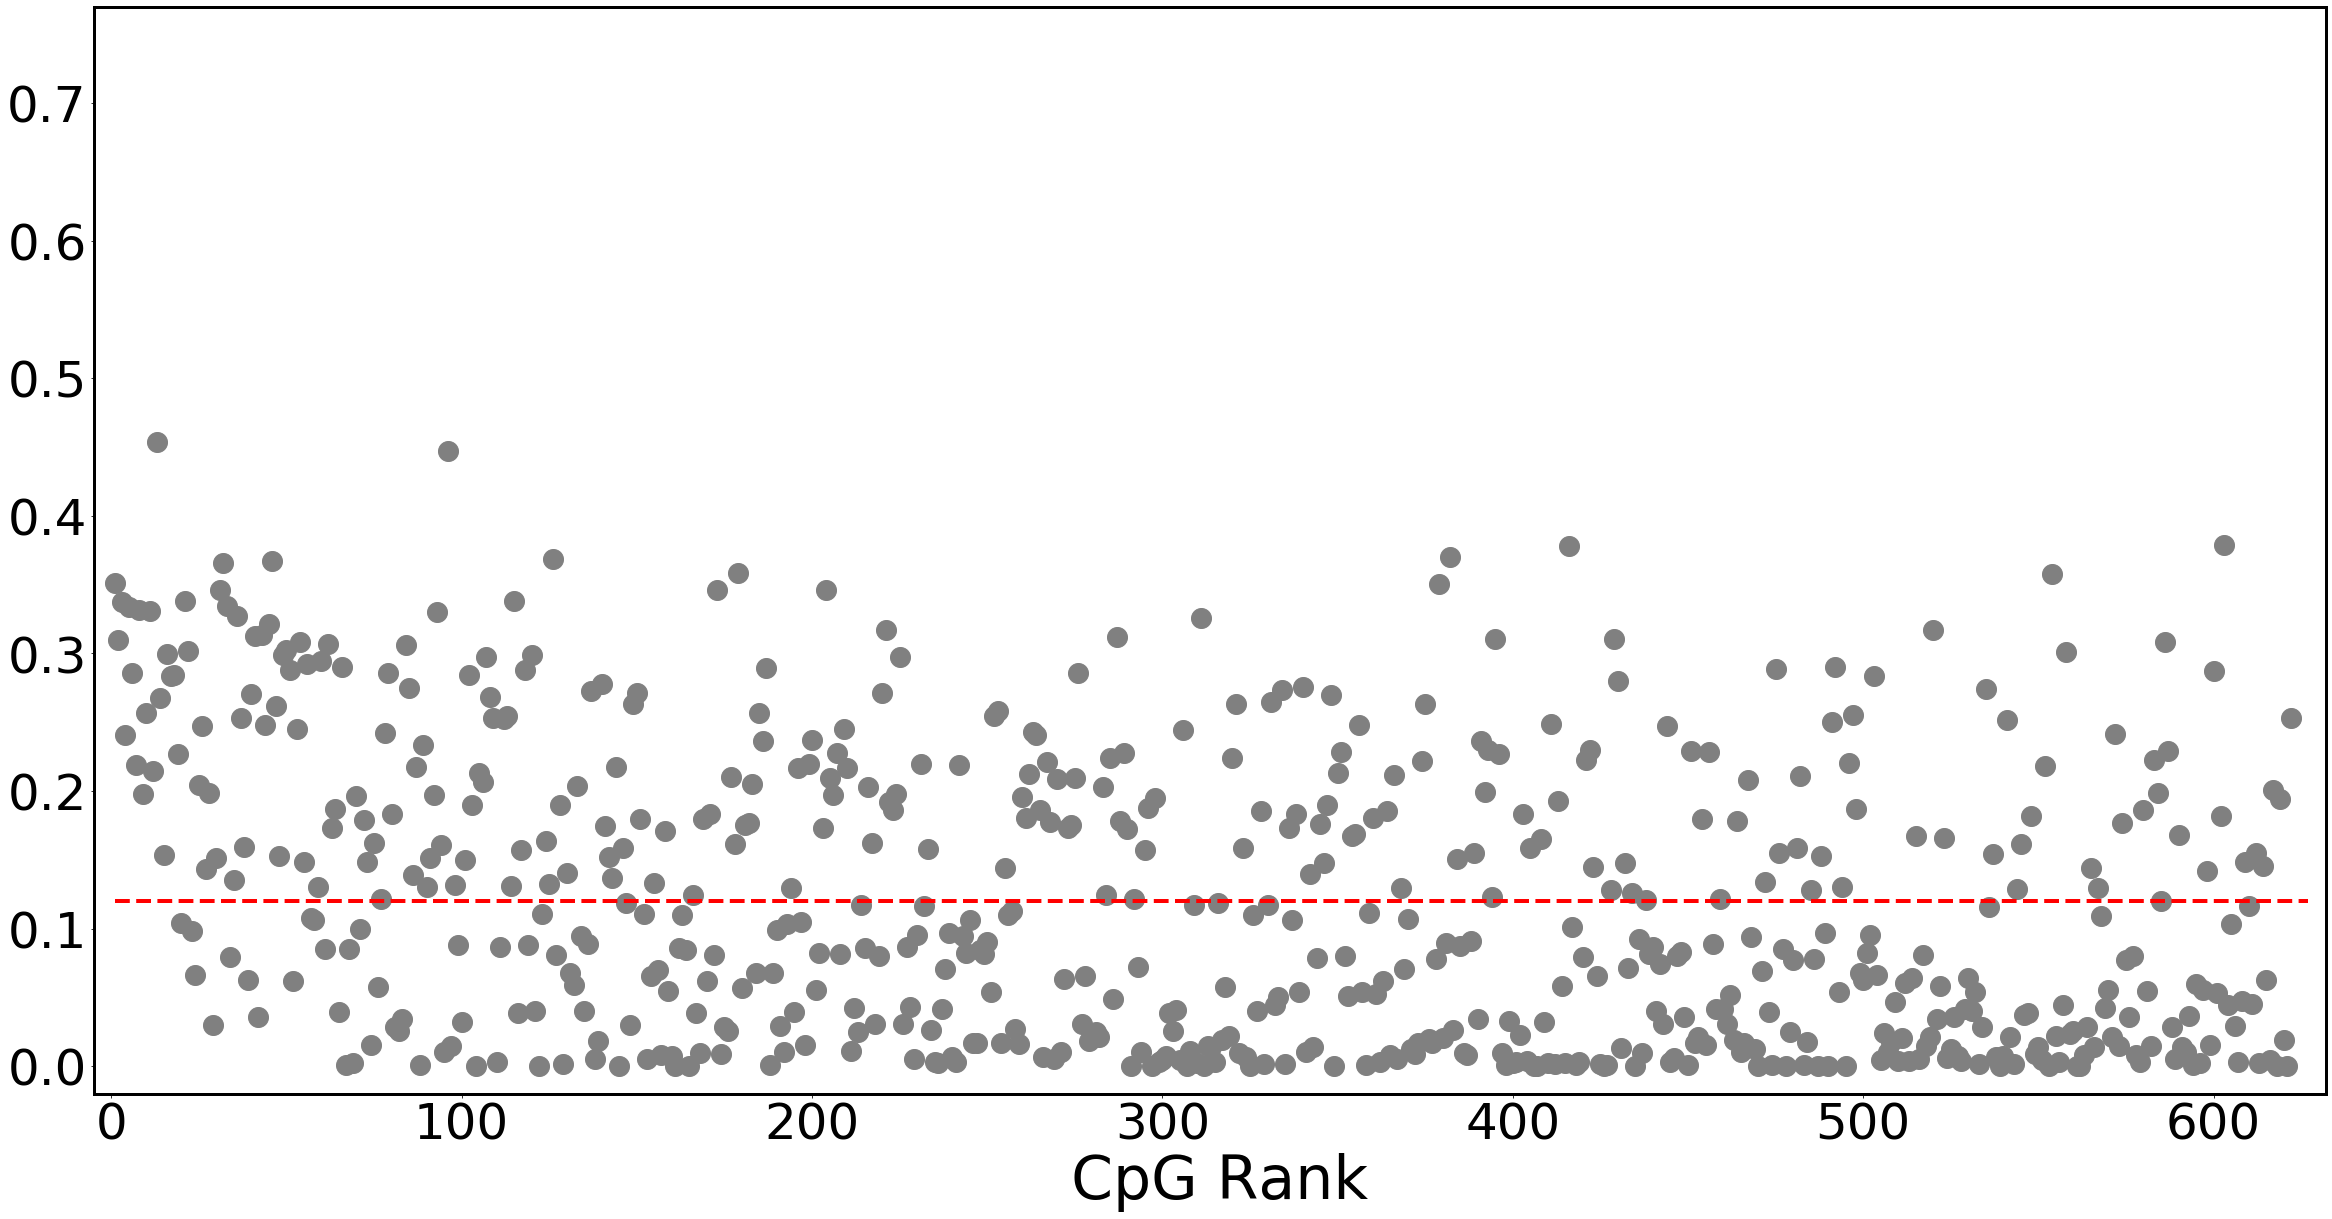

In [10]:
iter1model = joblib.load('Models/Fixed/model1 model.joblib')

hannum1 = hannum.drop(coefs0.CpG.tolist(), axis=1)

coefs1 = pd.DataFrame({'CpG': hannum1.columns,'Coef': iter1model.coef_})
coefs1 = coefs1.loc[coefs1.iloc[:,1]!=0]
coefs1 = coefs1.reindex(coefs1.Coef.abs().sort_values(ascending=False).index) 

rs1 = []
for cpg in coefs1.CpG.tolist():

    regression = stats.linregress(hannum[cpg].astype(float), ages.Age.astype(float))
    slope, intercept, rvalue, pvalue, stderr = regression
    rs1 += [rvalue*rvalue]

plt.figure(figsize=(40, 20))
plt.rcParams['axes.linewidth'] = 3 #set the value globally
plt.scatter(np.linspace(1, len(rs1), len(rs1)).astype(int), rs1, s=400, c='gray')
plt.xlabel(' CpG Rank',fontsize=60)
# plt.ylabel('R^2',fontsize=35)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.plot(np.linspace(1, len(rs1)+5, len(rs1)+5).astype(int),statistics.mean(rs1)*np.ones(len(rs1)+5), linewidth=4, c='r', linestyle='dashed')
plt.xlim([-5,len(rs1)+10])
plt.ylim([-0.02,0.77])
plt.savefig('Hannum figures/Figure 2/fixed/fig2 final/model1 features Rsquared', dpi=300)

# Panel 3D 

### top (Correlation)

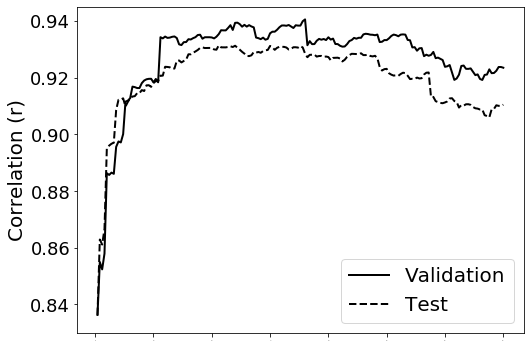

In [4]:
#read in dataframe of GSE40279 CpG age-correlations ranked by absolute value of Pearson's r 
hannumrs = pd.read_csv('Datasets/Hannum/Hannum rs.xlsx')
#read in GSE42861 to use as out-of-sample test set
arts_ages = pd.read_excel('datasets/Arthritis/Arthritis ages.xlsx')
arts = pd.read_pickle('datasets/Arthritis/Arthritis.pkl')

training_rs, training_maes, test_rs, test_maes = fsw_alg(hannum, ages, arts, arts_ages, hannumrs, 175)

plt.figure(figsize=(8, 6))
plt.plot(np.linspace(1,175,175,dtype=int),training_rs, c='k',label='Validation',linewidth=2 )
plt.plot(np.linspace(1,175,175,dtype=int),test_rs, c='k', linestyle='dashed', label='Test',linewidth=2)

# plt.xlabel('Number of predictors', fontsize=20)
plt.ylabel('Correlation (r)', fontsize=20)
plt.ylim([0.83, 0.945])
plt.xticks(fontsize=0)
plt.yticks(fontsize=18)
plt.legend(loc = 'lower right',prop={'size': 20})
# plt.savefig('Hannum figures/Figure 2/fixed/fig2 final/Additive correlation', dpi=300)

### bottom (MAE)

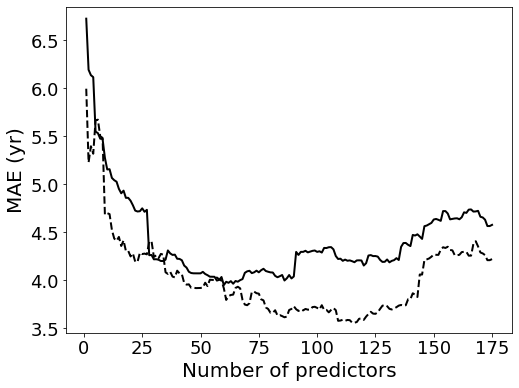

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(1,175,175,dtype=int),training_maes, c='k',label='Validation',linewidth=2 )
plt.plot(np.linspace(1,175,175,dtype=int),test_maes, c='k', linestyle='dashed', label='Test',linewidth=2)

plt.xlabel('Number of predictors', fontsize=20)
plt.ylabel('MAE (yr)', fontsize=20)
plt.ylim([3.45, 6.85])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()
# plt.savefig('Hannum figures/Figure 2/fixed/fig2 final/Additive MAE', dpi=300)

# Panel 3E

In [5]:
#read in dataframe of GSE40279 CpG age-correlations ranked by absolute value of Pearson's r 
hannumrs = pd.read_csv('Datasets/Hannum/Hannum rs.xlsx')
training_set = hannum[hannumrs.CpG.tolist()[:116]]

methyl_train, methyl_test, age_train, age_test = train_test_split(training_set, ages.Age, test_size=0.2, random_state=42)

fit, fsw_clock = ols_model(methyl_train,age_train)

#### 11  Mulitple sclerosis (GSE106648)

FSW clock on: MS
116 predictors
r = 0.950320860450199
p = 2.0047917844471955e-142
MAE = 2.8236135936548385


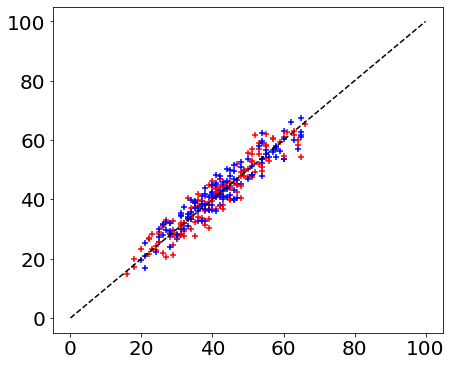

In [71]:
ms = pd.read_pickle('Datasets/MS/MS.pkl')
ms_ages = pd.read_excel('Datasets/MS/MS ages.xlsx')

ms = ms[hannumrs[:116].CpG.tolist()]

ms = fit.transform(ms)
preds = fsw_clock.predict(ms)
     
regression = stats.linregress(preds.astype(float), ms_ages.Age.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression

col = np.where(ms_ages['Disease Status'] == 'Healthy control','b','r')

#make scatterplot of age v. DNAm age and plot the BLP 

regression = stats.linregress(ms_ages.Age.astype(float), preds.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * ms_ages + intercept


plt.figure(figsize=(7, 6))
plt.scatter(ms_ages.Age.astype(float), preds, marker='+', c=col)
plt.plot(np.linspace(0,100, 100, dtype=int), np.linspace(0,100, 100, dtype=int), color='k', linestyle='dashed')

# plt.xlabel('Age (yrs)',fontsize=15)
# plt.ylabel('Predicted age (yrs)',fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
mae = metrics.mean_absolute_error(ms_ages.Age.astype(float), preds)


plt.savefig('Hannum figures/Figure 2/fixed/fig2 final/FSW OLS MS', dpi=300)

print('FSW clock on: MS')
print('116 predictors')
print('r =', rvalue)
print('p =', pvalue)
print('MAE =', mae)

#### 12 Down syndrome (GSE52588) 

FSW clock on: DS
116 predictors
r = 0.9648254186432229
p = 3.51813946028193e-48
MAE = 3.8659689136912916


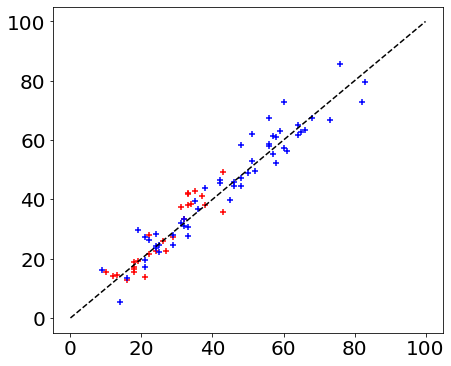

In [7]:
ds = pd.read_pickle('Datasets/Down syndrome/Dsyndrome.pkl')
ds_ages = pd.read_excel('Datasets/Down syndrome/Dsyndrome ages.xlsx')

ds_ages=ds_ages.set_index('REF_ID')

ds = ds[hannumrs[:116].CpG.tolist()]

ds_ages = ds_ages.drop(ds[ds.isna().any(axis=1)].index.tolist(), axis=0)
ds = ds.drop(ds[ds.isna().any(axis=1)].index.tolist(), axis=0)

ds = fit.transform(ds)

preds = fsw_clock.predict(ds)
     
regression = stats.linregress(preds.astype(float), ds_ages.Age.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression

col = np.where(ds_ages['Disease State'] == 'healthy','b','r')

#make scatterplot of age v. DNAm age and plot the BLP 

regression = stats.linregress(ds_ages.Age.astype(float), preds.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * ds_ages.Age + intercept


plt.figure(figsize=(7, 6))
plt.scatter(ds_ages.Age.astype(float), preds, marker='+', c=col)
plt.plot(np.linspace(0,100, 100, dtype=int), np.linspace(0,100, 100, dtype=int), color='k', linestyle='dashed')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
mae = metrics.mean_absolute_error(ds_ages.Age.astype(float), preds)
plt.show()

print('FSW clock on: DS')
print('116 predictors')
print('r =', rvalue)
print('p =', pvalue)
print('MAE =', mae)

plt.savefig('Hannum figures/Figure 2/fixed/fig2 final/FSW OLS DS', dpi=300)

#### 21 Irritable bowel syndrome (GSE87640)

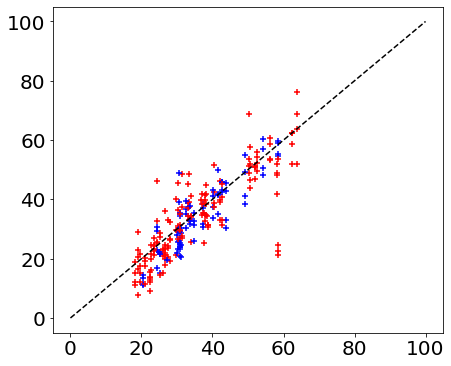

FSW clock on: IBS
116 predictors
r = 0.8456398357528697
p = 7.806785960364444e-67
MAE = 5.239508143342701


<Figure size 432x288 with 0 Axes>

In [8]:
ibd = pd.read_pickle('Datasets/IBS/IBS.pkl')
ibd_ages = pd.read_excel('Datasets/IBS/IBS ages.xlsx')

ibd = ibd[hannumrs[:116].CpG.tolist()]
ibd = fit.transform(ibd)

preds = fsw_clock.predict(ibd)
col = np.where(ibd_ages['Disease State'] == 'HC','b','r')

#make scatterplot of age v. DNAm age and plot the BLP 

regression = stats.linregress(ibd_ages.Age.astype(float), preds.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * ibd_ages.Age + intercept


plt.figure(figsize=(7, 6))
plt.scatter(ibd_ages.Age.astype(float), preds, marker='+', c=col)
plt.plot(np.linspace(0,100, 100, dtype=int), np.linspace(0,100, 100, dtype=int), color='k', linestyle='dashed')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
mae = metrics.mean_absolute_error(ibd_ages.Age.astype(float), preds)
plt.show()


print('FSW clock on: IBS')
print('116 predictors')
print('r =', rvalue)
print('p =', pvalue)
print('MAE =', mae)

# plt.savefig('Hannum figures/Figure 2/fixed/fig2 final/FSW OLS IBS', dpi=300)

#### 22 GSE42861 (arthritis)

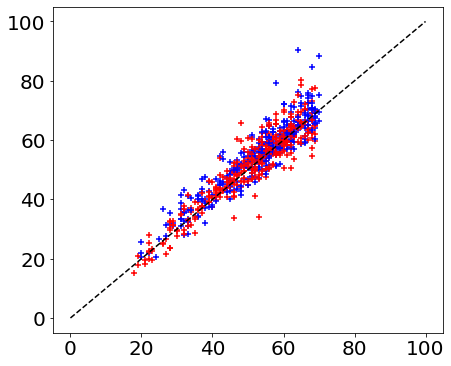

FSW clock on: Arthritis
116 predictors
r = 0.9279187652672886
p = 1.2752714368249574e-296
MAE = 3.555333695390565


In [5]:
#read in GSE42861 to use as out-of-sample test set
arts_ages = pd.read_excel('datasets/Arthritis/Arthritis ages.xlsx')
arts = pd.read_pickle('datasets/Arthritis/Arthritis.pkl')
art_meta = pd.read_excel('Datasets/Arthritis/Arthritis metadata.xlsx')

col = np.where(art_meta['Disease state'] == 'Normal','b','r')

test_set = arts[hannumrs.CpG.tolist()[:116]]
test_set = fit.transform(test_set)

preds = fsw_clock.predict(test_set)

#make scatterplot of age v. DNAm age and plot the BLP 

regression = stats.linregress(arts_ages.Age.astype(float), preds.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * arts_ages + intercept


plt.figure(figsize=(7, 6))
plt.scatter(arts_ages.Age.astype(float), preds, marker='+', c=col)
plt.plot(np.linspace(0,100, 100, dtype=int), np.linspace(0,100, 100, dtype=int), color='k', linestyle='dashed')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
mae = metrics.mean_absolute_error(arts_ages.Age.astype(float), preds)
plt.show()

print('FSW clock on: Arthritis')
print('116 predictors')
print('r =', rvalue)
print('p =', pvalue)
print('MAE =', mae)


# plt.savefig('Hannum figures/Figure 2/fixed/fig2 final/FSW OLS arthritis', dpi=300)